<a href="https://colab.research.google.com/github/Shubhangi105/BenchmarkingFHEModels/blob/main/Neural%20Networks/MNIST_normal_nn_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a neural network on MNIST dataset

This notebook contains the training of a neural network on MNIST dataset using the same archtecture as was used in Encrypted_NN.ipynb. Quantisation was not used in this case.

##Defining a neural network and training it.

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 192)
        self.fc2 = nn.Linear(192, 192)
        self.fc3 = nn.Linear(192, 192)
        self.fc4 = nn.Linear(192, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Training function with loss collection
def train(model, device, train_loader, optimizer, epoch, criterion):
    model.train()
    train_loss = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        if epoch % 4 == 0 and batch_idx % 500 == 0:
            print(
                f"Train Epoch: {epoch + 1} [{batch_idx}/{len(train_loader.dataset) // len(data)} "
                f"({100.0 * batch_idx / len(train_loader):.0f}%)]{'':5} "
                f"\tLoss: {loss.item():.6f}"
            )

    return train_loss / len(train_loader.dataset)

# Testing function with loss collection
def test(model, device, test_loader, epoch, criterion):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in tqdm(test_loader, disable=epoch % 4 != 0):
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    if epoch % 4 == 0:
        print(
            f"Test set: Average loss: {test_loss:.4f}, "
            "Accuracy: "
            f"{correct}/{len(test_loader.dataset)} "
            f"({100.0 * correct / len(test_loader.dataset):.0f}%)"
        )

    return test_loss

# Manage dataset function
def manage_dataset(train_kwargs, test_kwargs):
    """Get training and test parts of MNIST dataset."""
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
        transforms.Lambda(torch.flatten),
    ])

    # Manage datasets
    dataset1 = datasets.MNIST("./data", train=True, download=True, transform=transform)
    dataset2 = datasets.MNIST("./data", train=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1, **train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    return train_loader, test_loader

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set training and test parameters
train_params = {'batch_size': 32, 'shuffle': True}
test_params = {'batch_size': 32, 'shuffle': False}

# Create the model, optimizer, and criterion
model = SimpleNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02)
criterion = nn.CrossEntropyLoss()

# Lists to store training and test losses
train_losses = []
test_losses = []

# Train the model for 20 epochs
for epoch in range(20):
    train_loader, test_loader = manage_dataset(train_params, test_params)
    train_loss = train(model, device, train_loader, optimizer, epoch, criterion)
    test_loss = test(model, device, test_loader, epoch, criterion)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Print or use train_losses and test_losses as needed
print("Training Losses:", train_losses)
print("Test Losses:", test_losses)


100%|██████████| 9912422/9912422 [00:00<00:00, 129121927.66it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 20576812.27it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45707374.34it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 22760488.37it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Train Epoch: 1 [0/1875 (0%)]      	Loss: 2.307159
Train Epoch: 1 [500/1875 (27%)]      	Loss: 0.722652
Train Epoch: 1 [1000/1875 (53%)]      	Loss: 0.576665
Train Epoch: 1 [1500/1875 (80%)]      	Loss: 0.101730


100%|██████████| 313/313 [00:01<00:00, 170.31it/s]


Test set: Average loss: 0.0063, Accuracy: 9403/10000 (94%)
Train Epoch: 5 [0/1875 (0%)]      	Loss: 0.039343
Train Epoch: 5 [500/1875 (27%)]      	Loss: 0.133233
Train Epoch: 5 [1000/1875 (53%)]      	Loss: 0.251695
Train Epoch: 5 [1500/1875 (80%)]      	Loss: 0.081775


100%|██████████| 313/313 [00:01<00:00, 182.40it/s]


Test set: Average loss: 0.0029, Accuracy: 9697/10000 (97%)
Train Epoch: 9 [0/1875 (0%)]      	Loss: 0.218469
Train Epoch: 9 [500/1875 (27%)]      	Loss: 0.001823
Train Epoch: 9 [1000/1875 (53%)]      	Loss: 0.009314
Train Epoch: 9 [1500/1875 (80%)]      	Loss: 0.118663


100%|██████████| 313/313 [00:01<00:00, 178.90it/s]


Test set: Average loss: 0.0023, Accuracy: 9779/10000 (98%)
Train Epoch: 13 [0/1875 (0%)]      	Loss: 0.067034
Train Epoch: 13 [500/1875 (27%)]      	Loss: 0.005334
Train Epoch: 13 [1000/1875 (53%)]      	Loss: 0.009243
Train Epoch: 13 [1500/1875 (80%)]      	Loss: 0.003869


100%|██████████| 313/313 [00:01<00:00, 182.48it/s]


Test set: Average loss: 0.0025, Accuracy: 9773/10000 (98%)
Train Epoch: 17 [0/1875 (0%)]      	Loss: 0.001887
Train Epoch: 17 [500/1875 (27%)]      	Loss: 0.000252
Train Epoch: 17 [1000/1875 (53%)]      	Loss: 0.000791
Train Epoch: 17 [1500/1875 (80%)]      	Loss: 0.000347


100%|██████████| 313/313 [00:01<00:00, 184.26it/s]


Test set: Average loss: 0.0024, Accuracy: 9802/10000 (98%)
Training Losses: [0.015714242379243175, 0.005282561111838246, 0.003555496345006395, 0.002671930053461498, 0.002109807262121467, 0.001662654498073971, 0.0013075232496407505, 0.001045431860803122, 0.0008500094905883695, 0.0007101041363234496, 0.0005594043664451723, 0.0004102227820773502, 0.0003324810494266179, 0.00026812975190308253, 0.00020954184824098168, 0.00012818540105527062, 8.815588966428247e-05, 6.792938676174648e-05, 5.280016915205579e-05, 3.920965834277013e-05]
Test Losses: [0.006272600439237431, 0.004239231602672953, 0.003334218143852195, 0.0027735010517557384, 0.002884140080047655, 0.00230133400233899, 0.00232492313504481, 0.0022470368107366085, 0.0023218009222415277, 0.002941908222267375, 0.0022707814087694713, 0.002184131176148503, 0.002486025803611642, 0.0022620658384126953, 0.0023146353757148063, 0.002425902941378695, 0.00236459367838161, 0.0023692933845295555, 0.0024326058459224285, 0.0024811317190187353]


In [ ]:
#Printing out the training losses
train_losses

[0.015714242379243175,
 0.005282561111838246,
 0.003555496345006395,
 0.002671930053461498,
 0.002109807262121467,
 0.001662654498073971,
 0.0013075232496407505,
 0.001045431860803122,
 0.0008500094905883695,
 0.0007101041363234496,
 0.0005594043664451723,
 0.0004102227820773502,
 0.0003324810494266179,
 0.00026812975190308253,
 0.00020954184824098168,
 0.00012818540105527062,
 8.815588966428247e-05,
 6.792938676174648e-05,
 5.280016915205579e-05,
 3.920965834277013e-05]

In [ ]:
# Printing out the test losses
test_losses

[0.006272600439237431,
 0.004239231602672953,
 0.003334218143852195,
 0.0027735010517557384,
 0.002884140080047655,
 0.00230133400233899,
 0.00232492313504481,
 0.0022470368107366085,
 0.0023218009222415277,
 0.002941908222267375,
 0.0022707814087694713,
 0.002184131176148503,
 0.002486025803611642,
 0.0022620658384126953,
 0.0023146353757148063,
 0.002425902941378695,
 0.00236459367838161,
 0.0023692933845295555,
 0.0024326058459224285,
 0.0024811317190187353]

##Different plots

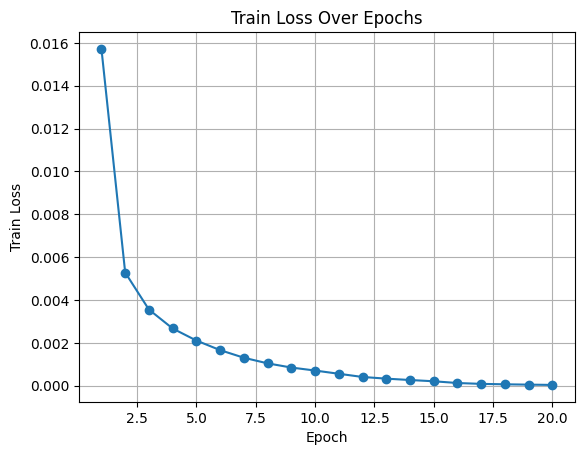

In [ ]:
plt.plot(range(1, 21), train_losses, marker='o')
plt.title('Train Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.grid(True)
plt.show()

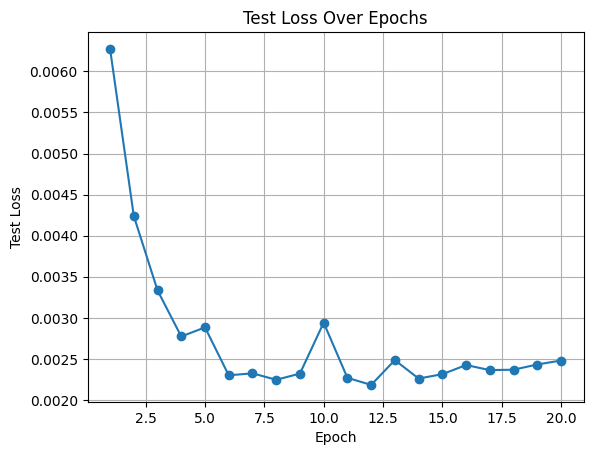

In [ ]:
plt.plot(range(1, 21), test_losses, marker='o')
plt.title('Test Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.grid(True)
plt.show()

Plotting the accuracy of this neural network with the one from Encrypted_NN.ipynb file for different bit size.

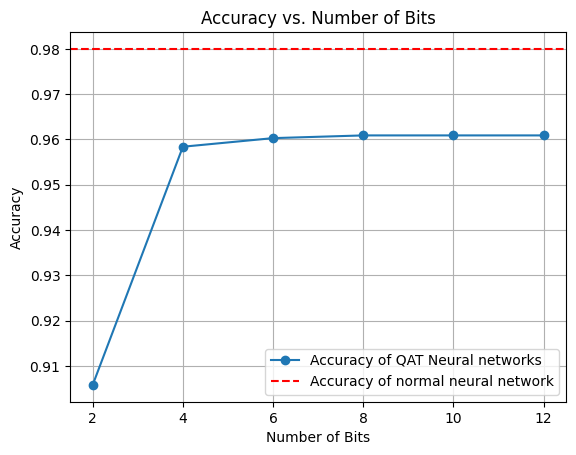

In [ ]:
accuracy_values = [0.9058,0.9584,0.9603,0.9609,0.9609,0.9609]
loss =[0.0099, 0.0041, 0.0039,0.0039,0.0039,0.0039]
n_bits_values = [2,4,6,8,10,12]

plt.plot(n_bits_values, accuracy_values, marker='o',label='Accuracy of QAT Neural networks')  # Plot accuracy vs. n_bits
plt.axhline(y=0.98, color='r', linestyle='--', label='Accuracy of normal neural network')
plt.title('Accuracy vs. Number of Bits')
plt.xlabel('Number of Bits')
plt.ylabel('Accuracy')
plt.xticks(n_bits_values)  # Set actual values on x-axis
plt.grid(True)
plt.legend()
plt.show()